* ## 그래픽 설정

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

def get_font_family():
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null
        import matplotlib.font_manager as fm
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family
get_font_family()
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스폰트 설정
plt.rc('axes', unicode_minus=False)
# 그래프 스타일 설정
plt.style.use('ggplot')
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

* ## 데이터 로드 

In [2]:
df = pd.read_csv('./data/2nd/실전db.csv')
df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


* ## 데이터 기본 특성

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   USER_ID     879271 non-null  int64 
 1   JOIN_DATE   879271 non-null  object
 2   D_TYPE      879271 non-null  object
 3   STORE_ID    879271 non-null  int64 
 4   GOODS_TYPE  879271 non-null  object
 5   DATE        879271 non-null  object
 6   COUNT       879271 non-null  int64 
 7   AD1         879271 non-null  object
dtypes: int64(3), object(5)
memory usage: 53.7+ MB


In [4]:
df['COUNT'].describe()

count    879271.000000
mean          1.029079
std           0.512428
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          61.000000
Name: COUNT, dtype: float64

In [5]:
df.nunique()

USER_ID       165425
JOIN_DATE       2352
D_TYPE             3
STORE_ID        1061
GOODS_TYPE         4
DATE             366
COUNT             56
AD1               85
dtype: int64

In [6]:
np.sort(df['JOIN_DATE'].unique())

array(['1970-01-01', '2013-12-16', '2013-12-17', ..., '2020-12-29',
       '2020-12-30', '2020-12-31'], dtype=object)

* JOIN_DATE에 대한 '1970-01-01' 이상치 탐지

* ## JOIN_DATE에 대한 이상치 데이터 알아보기

In [7]:
df_1970 = df[df['JOIN_DATE']=='1970-01-01']
df_1970

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
437,1081430,1970-01-01,CC,90070,A,2020-01-01,1,GD
2196,1410151,1970-01-01,CC,92437,B,2020-01-02,1,J
2204,1415023,1970-01-01,CC,131081,A,2020-01-02,1,YO
2434,125582,1970-01-01,CC,91885,A,2020-01-03,1,YD
2645,602188,1970-01-01,CC,2334,B,2020-01-03,1,MP
...,...,...,...,...,...,...,...,...
866536,1723400,1970-01-01,CC,190188,A,2020-12-26,1,JR
867913,1723400,1970-01-01,CC,190188,A,2020-12-27,1,JR
868210,1825656,1970-01-01,CC,219936,A,2020-12-27,1,YD
873707,1828010,1970-01-01,CC,220635,C,2020-12-29,1,GN


In [8]:
df_1970.shape

(1093, 8)

In [9]:
df_1970.D_TYPE.unique()

array(['CC'], dtype=object)

In [10]:
df_1970.sort_values('DATE')['USER_ID'].unique()

array([1081430, 1410151, 1415023,  125582,  602188,  863534,  800726,
        827066, 1443213, 1457910,  244757, 1436002, 1297772,  334911,
       1355917,  775829, 1363699, 1464338, 1461286, 1251357,  859104,
       1470901, 1471623, 1472233, 1473716, 1474351,  859401, 1475076,
       1402070,  394897,  623140, 1477219, 1477298,  309861, 1247912,
       1480436, 1480485, 1412998, 1482519, 1482230, 1317424, 1486499,
       1487615,  142858, 1490093, 1486392, 1364343, 1230331, 1492461,
       1493307, 1210425, 1493599, 1384225, 1223554, 1494062, 1252982,
        367883, 1112612, 1060294, 1289070, 1495398, 1398093, 1501134,
       1407980, 1501541, 1487370, 1075881, 1503987, 1501209, 1507551,
       1507503,  974041, 1484453,  215321,  818965, 1514588,  186416,
         43226, 1318779, 1519466, 1518553, 1518115,  787367, 1519638,
       1520812, 1520914, 1521279, 1521259,  620313,  654237, 1523533,
        722355, 1525313, 1526119, 1527753, 1527777,  852001, 1530086,
       1530960,  946

In [11]:
len(df_1970.sort_values('DATE')['USER_ID'].unique())

264

In [12]:
df[df['USER_ID']==1415023]

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
2204,1415023,1970-01-01,CC,131081,A,2020-01-02,1,YO
39155,1415023,1970-01-01,CC,131081,A,2020-01-22,1,YO
41087,1415023,1970-01-01,CC,131081,A,2020-01-23,1,YO
46522,1415023,1970-01-01,CC,131081,A,2020-01-28,1,YO
48444,1415023,1970-01-01,CC,131081,A,2020-01-29,1,YO
50347,1415023,1970-01-01,CC,131081,A,2020-01-30,1,YO
52479,1415023,1970-01-01,CC,131081,A,2020-01-31,1,YO
71135,1415023,1970-01-01,CC,131081,A,2020-02-10,1,YO
73009,1415023,1970-01-01,CC,131081,A,2020-02-11,1,YO
74965,1415023,1970-01-01,CC,131081,A,2020-02-12,1,YO


In [13]:
df[df['USER_ID']==1829458]

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
879171,1829458,1970-01-01,CC,137452,A,2020-12-31,1,CY


* 264개의 user들이 JOIN_DATE를 1970-01-01로 가지고 있고 이 경우 D_TYPE이 모두 CC이고 user중에 한번에서 다수 사용까지 꽤 다양하게 분포함

* ## 1970-01-01 전처리 : 1970-01-01을 제외한 가장 빠른 가입일 2013-12-16로 변경

In [14]:
df.loc[df['JOIN_DATE']=='1970-01-01', 'JOIN_DATE'] = '2013-12-16'

* ## 날짜에 관한 feature 생성

In [15]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day
df['DoW'] = df['DATE'].dt.day_name()

df['JOIN_DATE'] = pd.to_datetime(df['JOIN_DATE'])
df['j_year'] = df['JOIN_DATE'].dt.year
df['j_month'] = df['JOIN_DATE'].dt.month
df['j_day'] = df['JOIN_DATE'].dt.day
df['j_DoW'] = df['JOIN_DATE'].dt.day_name()

df['ELAPSED_DAY'] = (df['DATE']-df['JOIN_DATE']).dt.days   # 경과일
df['ELAPSED_TIME'] = df['ELAPSED_DAY']*24 *60              # 경과시간
df['ELAPSED_WEEK'] = (df['ELAPSED_DAY'] -1)//7 + 1         # 경과주


In [16]:
# 2020년 공휴일 지정
import pandas as pd
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday

class Calendar(AbstractHolidayCalendar):
    rules = [
        Holiday('New Year', month=1, day=1),
        Holiday('KR_New Year1', month=1, day=24),
        Holiday('KR_New Year2', month=1, day=25),
        Holiday('KR_New Year3', month=1, day=26),
        Holiday('3.1', month=3, day=1),
        Holiday('Buddha Day', month=4, day=30),
        Holiday('Memorial Day', month=6, day=6),
        Holiday('Liberation Day', month=8, day=15),
        Holiday('KR_Thanksgiving1', month=9, day=30),
        Holiday('KR_Thanksgiving2', month=10, day=1),
        Holiday('KR_Thanksgiving3', month=10, day=2),
        Holiday('National Foundation Day', month=10, day=3),
        Holiday('Hangul Day', month=10, day=9),
        Holiday('Christmas', month=12, day=25)
    ]
    
    
dr = pd.date_range(start='2020-01-01', end='2020-12-31')
cal = Calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())
df['Holiday'] = df['DATE'].isin(holidays)

In [17]:
df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,year,month,day,DoW,j_year,j_month,j_day,j_DoW,ELAPSED_DAY,ELAPSED_TIME,ELAPSED_WEEK,Holiday
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2020,1,1,Wednesday,2014,1,7,Tuesday,2185,3146400,313,True
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2020,1,1,Wednesday,2014,2,14,Friday,2147,3091680,307,True
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2020,1,1,Wednesday,2014,11,20,Thursday,1868,2689920,267,True
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2020,1,1,Wednesday,2014,12,4,Thursday,1854,2669760,265,True
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2020,1,1,Wednesday,2014,12,7,Sunday,1851,2665440,265,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020,12,31,Thursday,2020,12,31,Thursday,0,0,0,False
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020,12,31,Thursday,2020,12,31,Thursday,0,0,0,False
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020,12,31,Thursday,2020,12,31,Thursday,0,0,0,False
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020,12,31,Thursday,2020,12,31,Thursday,0,0,0,False


# DATA EDA

* ## DATE 별 이용 고객 현황

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


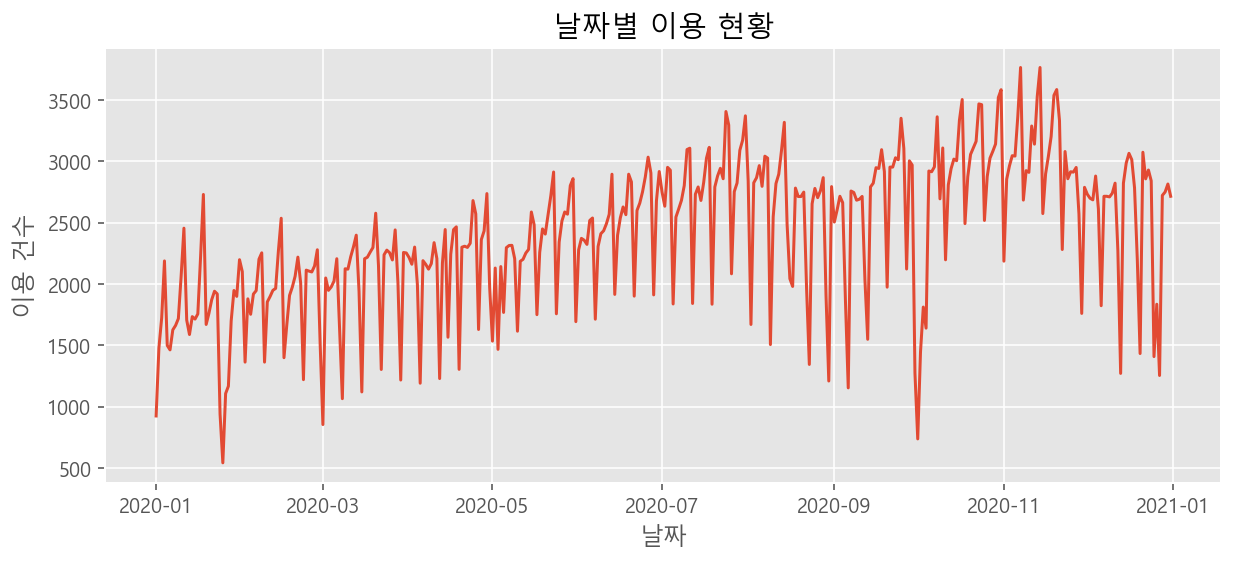

In [18]:
plt.figure(figsize=(10,4))
sns.lineplot(df['DATE'].value_counts().index, df['DATE'].value_counts().values)
plt.title('날짜별 이용 현황')
plt.xlabel('날짜')
plt.ylabel('이용 건수')
plt.show()

* ## 요일별 사용현황 
    * 가장 많이 사용하는 날 : 금요일 
    * 가장 적게 사용하는 날 : 일요일
    * 요일 별 토요일, 금요일에 제일 오래 사용

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


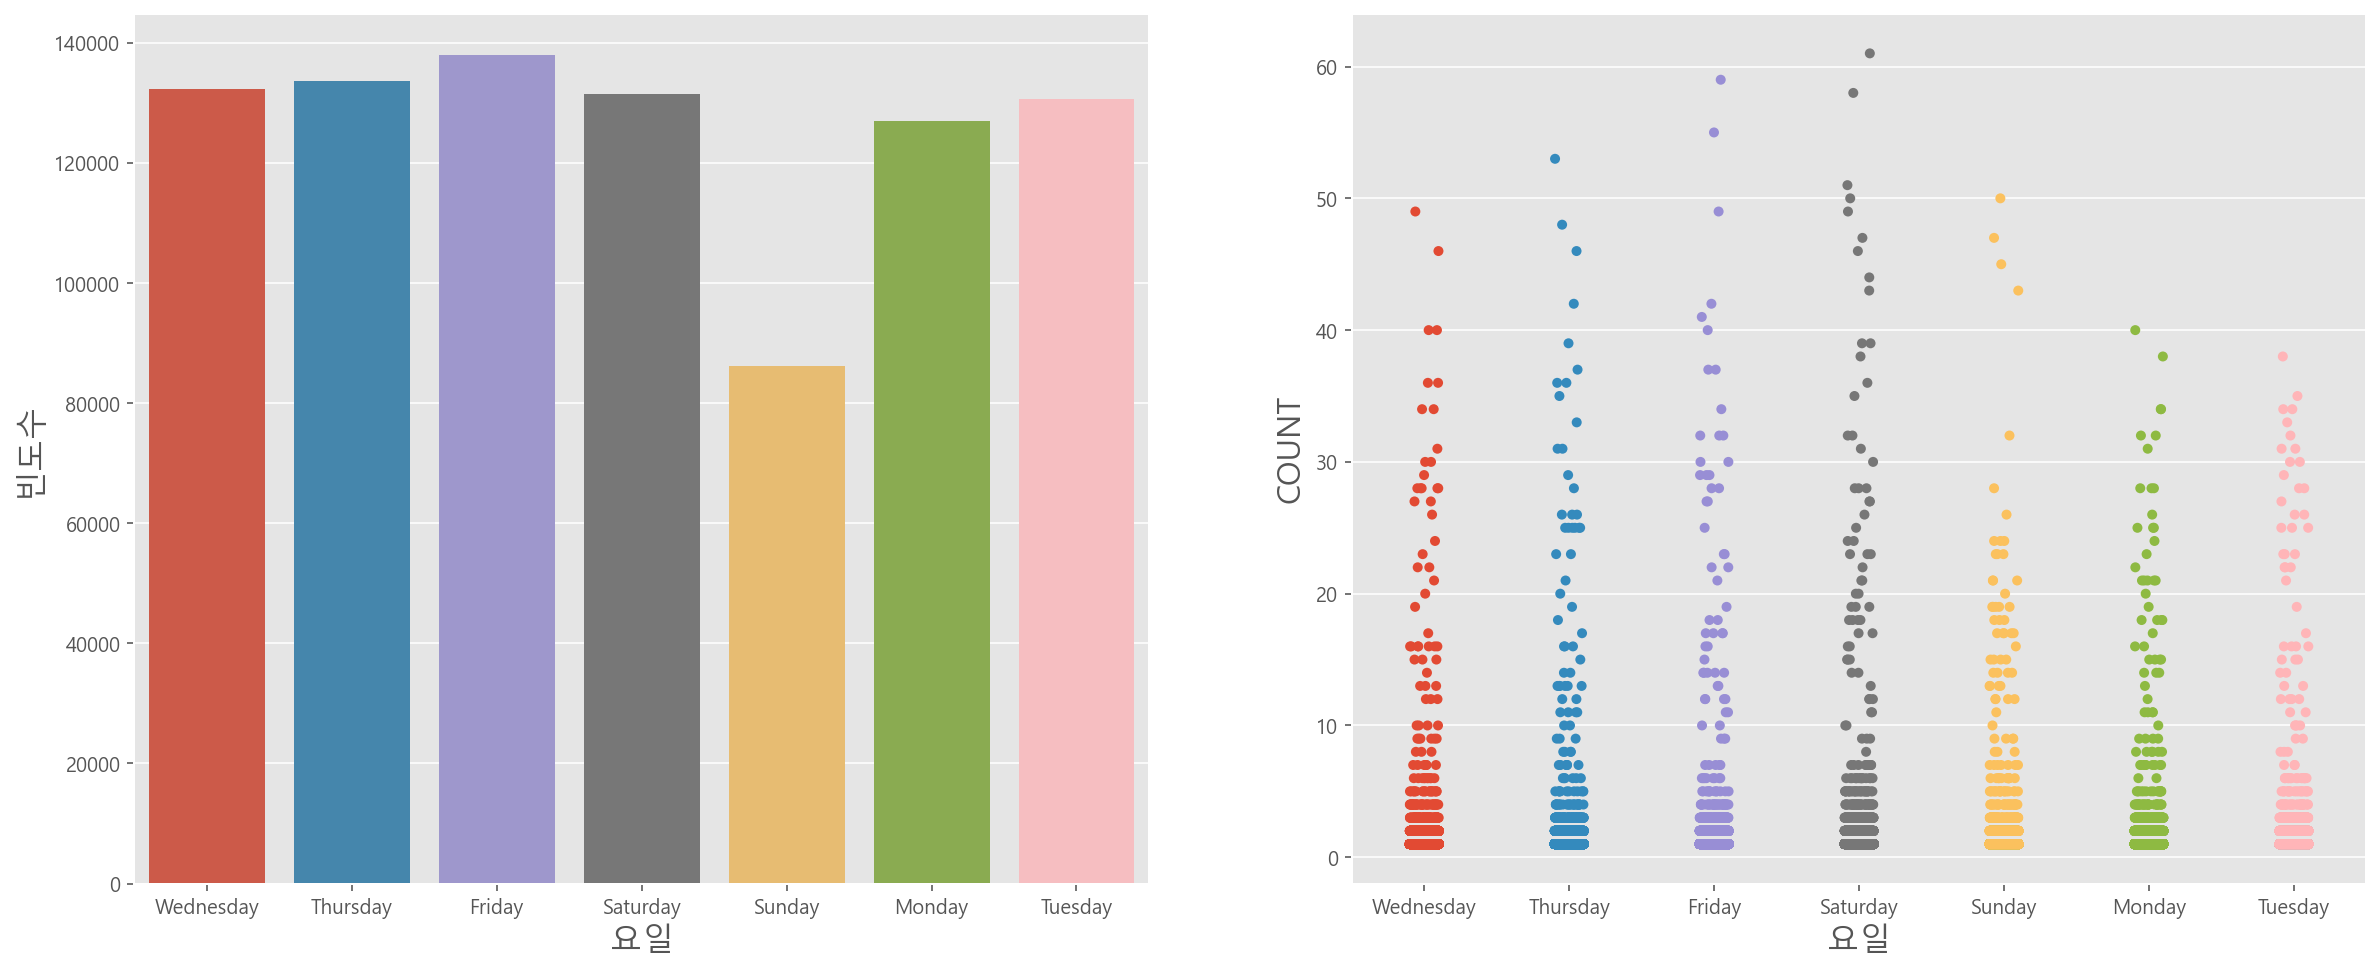

In [19]:
fig = plt.figure(figsize=(20,8))
gs = GridSpec(1,2)
sns.countplot(data=df, x='DoW', ax = fig.add_subplot(gs[0,0]))

plt.ylabel('빈도수', fontsize=16)
plt.xlabel('요일', fontsize=16)

sns.stripplot(x=df['DoW'], y=df['COUNT'], ax=fig.add_subplot(gs[0,1]))
plt.ylabel('COUNT', fontsize=16)
plt.xlabel('요일', fontsize=16)
fig.show()

* ## D_TYPE 별 이용 사용 현황
    * AA를 가장 많이 사용하고 CC를 가장 극단적으로 적게 사용
    * CC의 경우 COUNT의 값이 월등히 높음

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


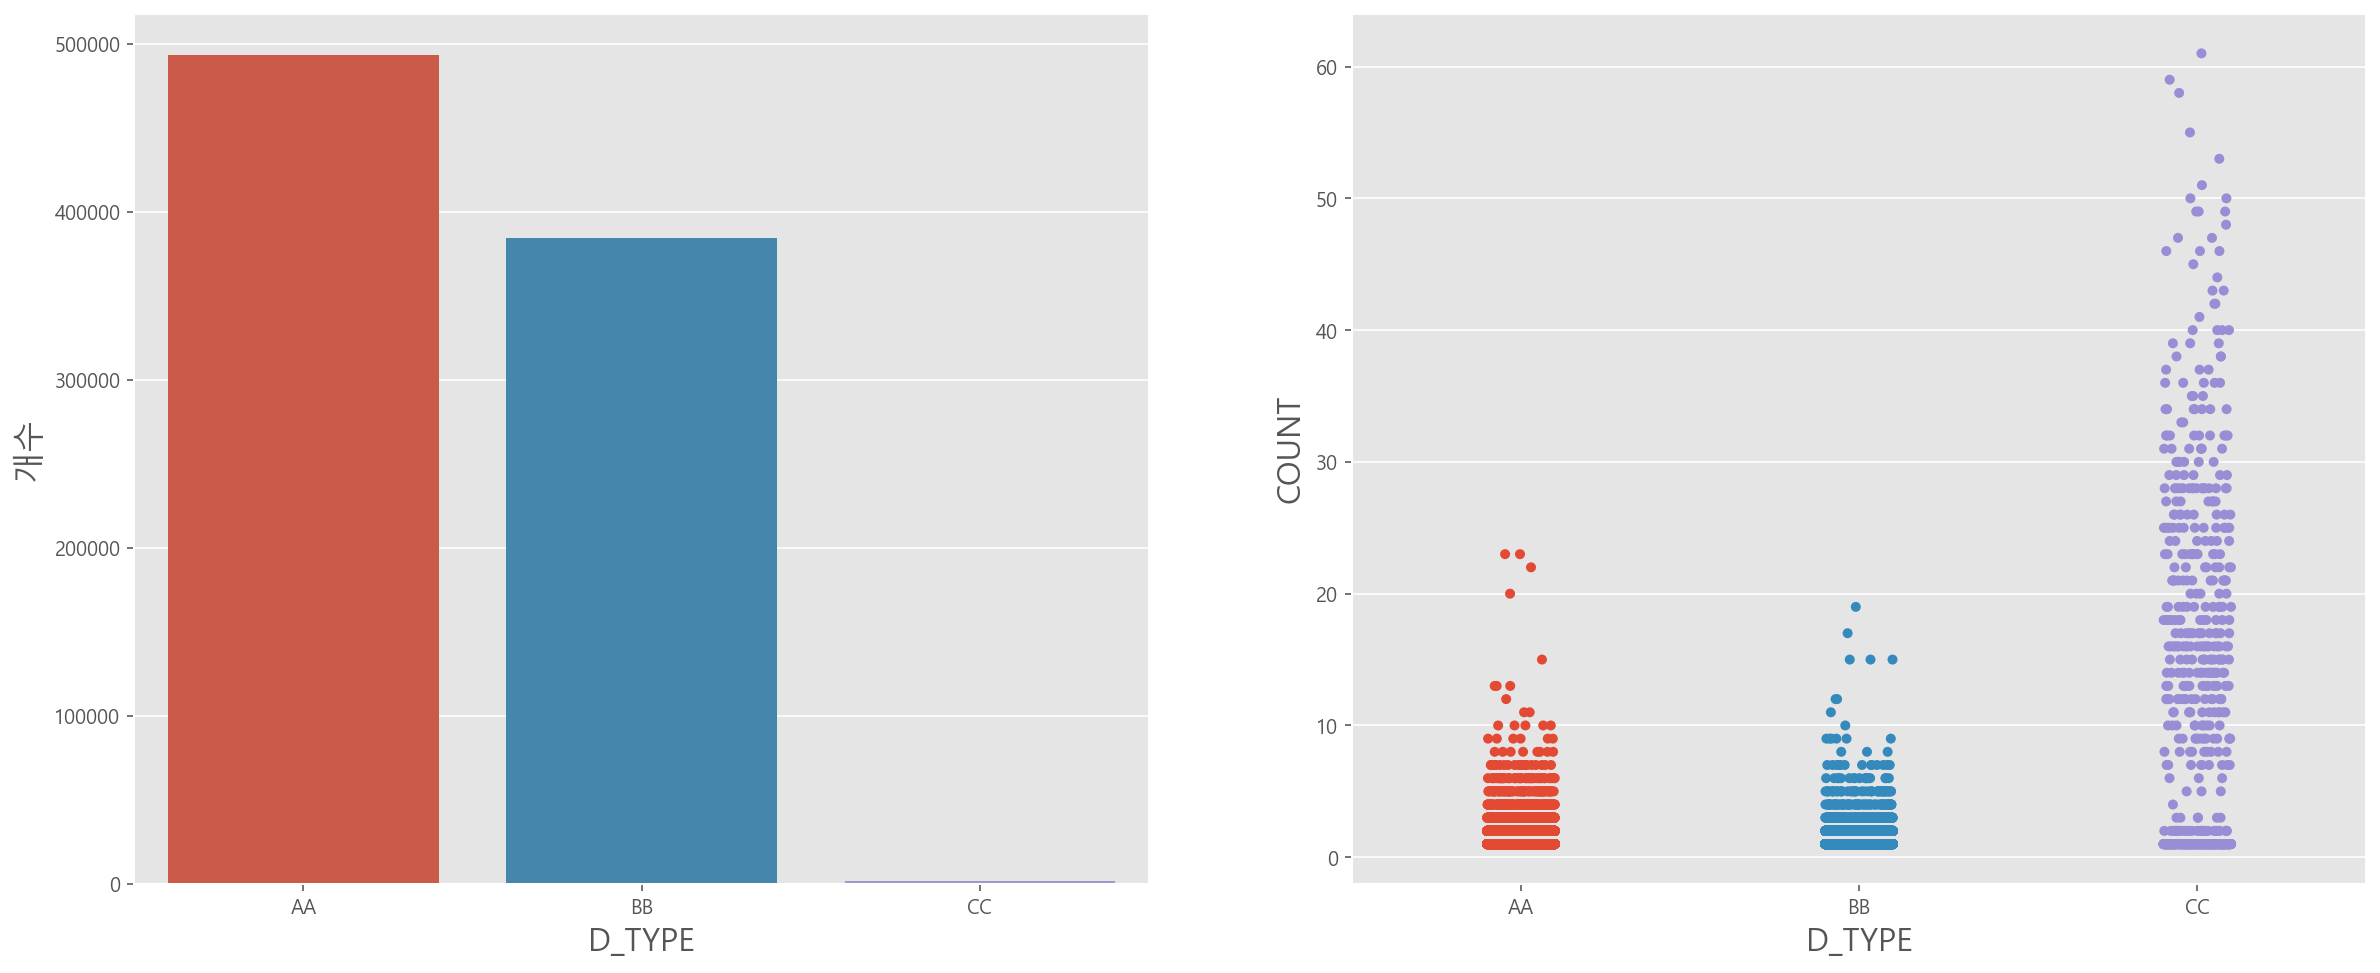

In [20]:
fig = plt.figure(figsize=(20,8))
sns.countplot(data=df, x='D_TYPE', ax=fig.add_subplot(gs[0,0]))

plt.ylabel('개수', fontsize=16)
plt.xlabel('D_TYPE', fontsize=16)

sns.stripplot(x=df['D_TYPE'], y=df['COUNT'], ax=fig.add_subplot(gs[0,1]))
plt.ylabel('COUNT', fontsize=16)
plt.xlabel('D_TYPE', fontsize=16)
fig.show()

* ## STORE_ID

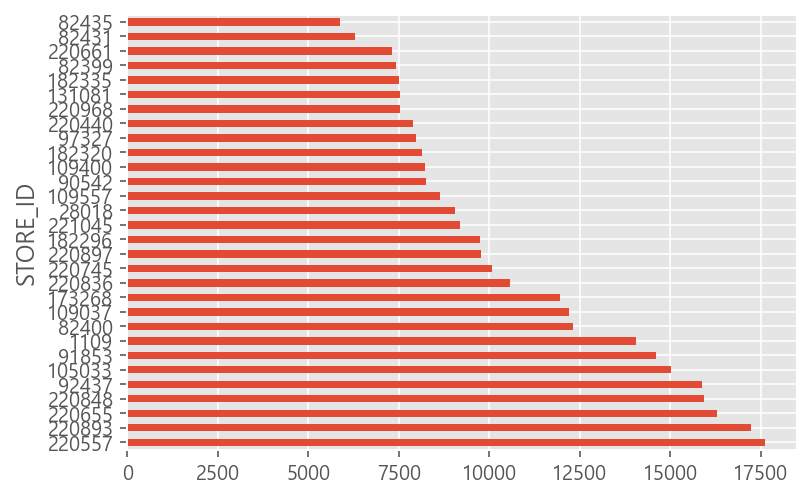

In [21]:
store_count = df.groupby('STORE_ID').count()['USER_ID'].sort_values(ascending=False)[:30].plot.barh()

* ## COUNT
    * 1~61까지 다양하게 분포
    * COUNT의 경우 1이 압도적으로 많다.

In [20]:
df['COUNT'].unique()

array([ 1,  2,  6, 11,  3,  7,  4, 28, 14,  9, 13, 12, 21, 19,  5, 10,  8,
       23, 27, 20, 16, 18, 33, 17, 15, 25, 24, 22, 39, 31, 32, 36, 29, 30,
       34, 26, 35, 49, 37, 38, 48, 43, 40, 47, 42, 51, 50, 45, 46, 55, 61,
       59, 58, 53, 41, 44], dtype=int64)

Text(0.5, 0, 'COUNT')

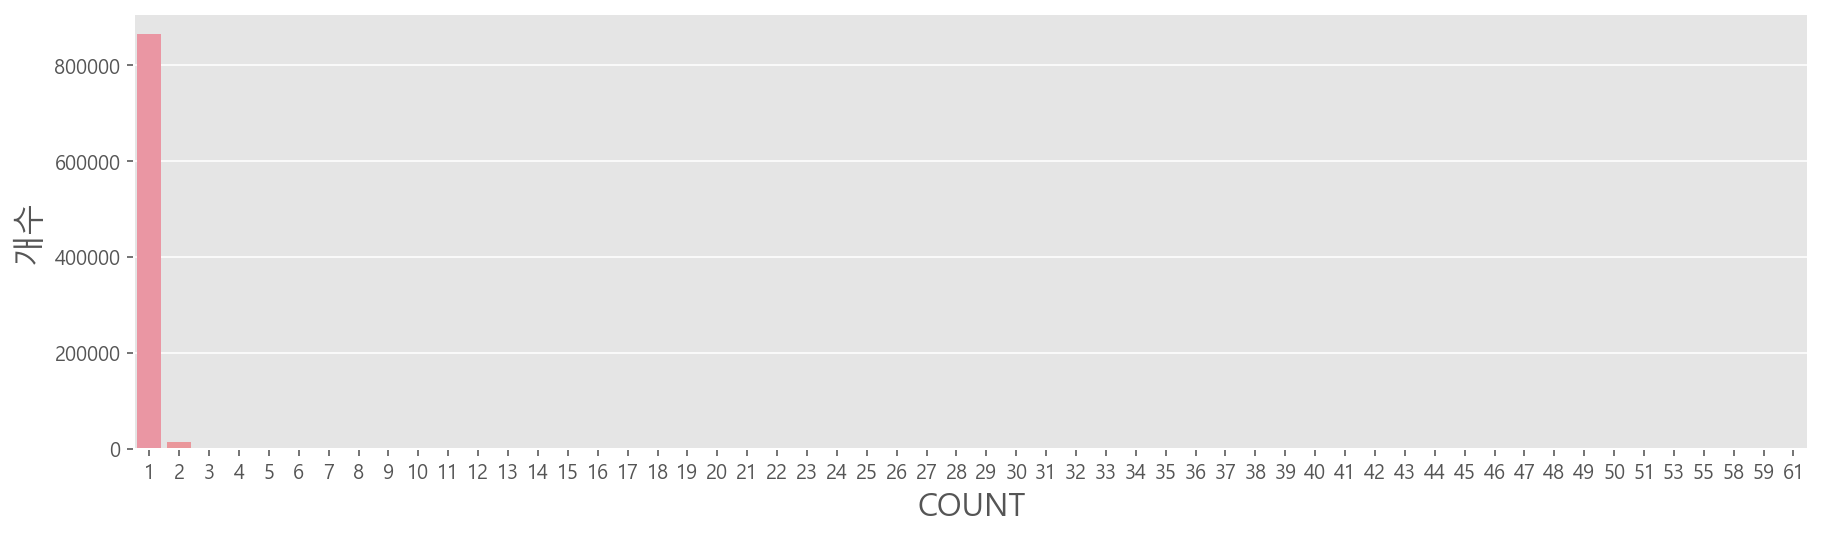

In [21]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x='COUNT')

plt.ylabel('개수', fontsize=16)
plt.xlabel('COUNT', fontsize=16)

* ## GOODS_TYPE

C:\ProgramData\Anaconda3\envs\data_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


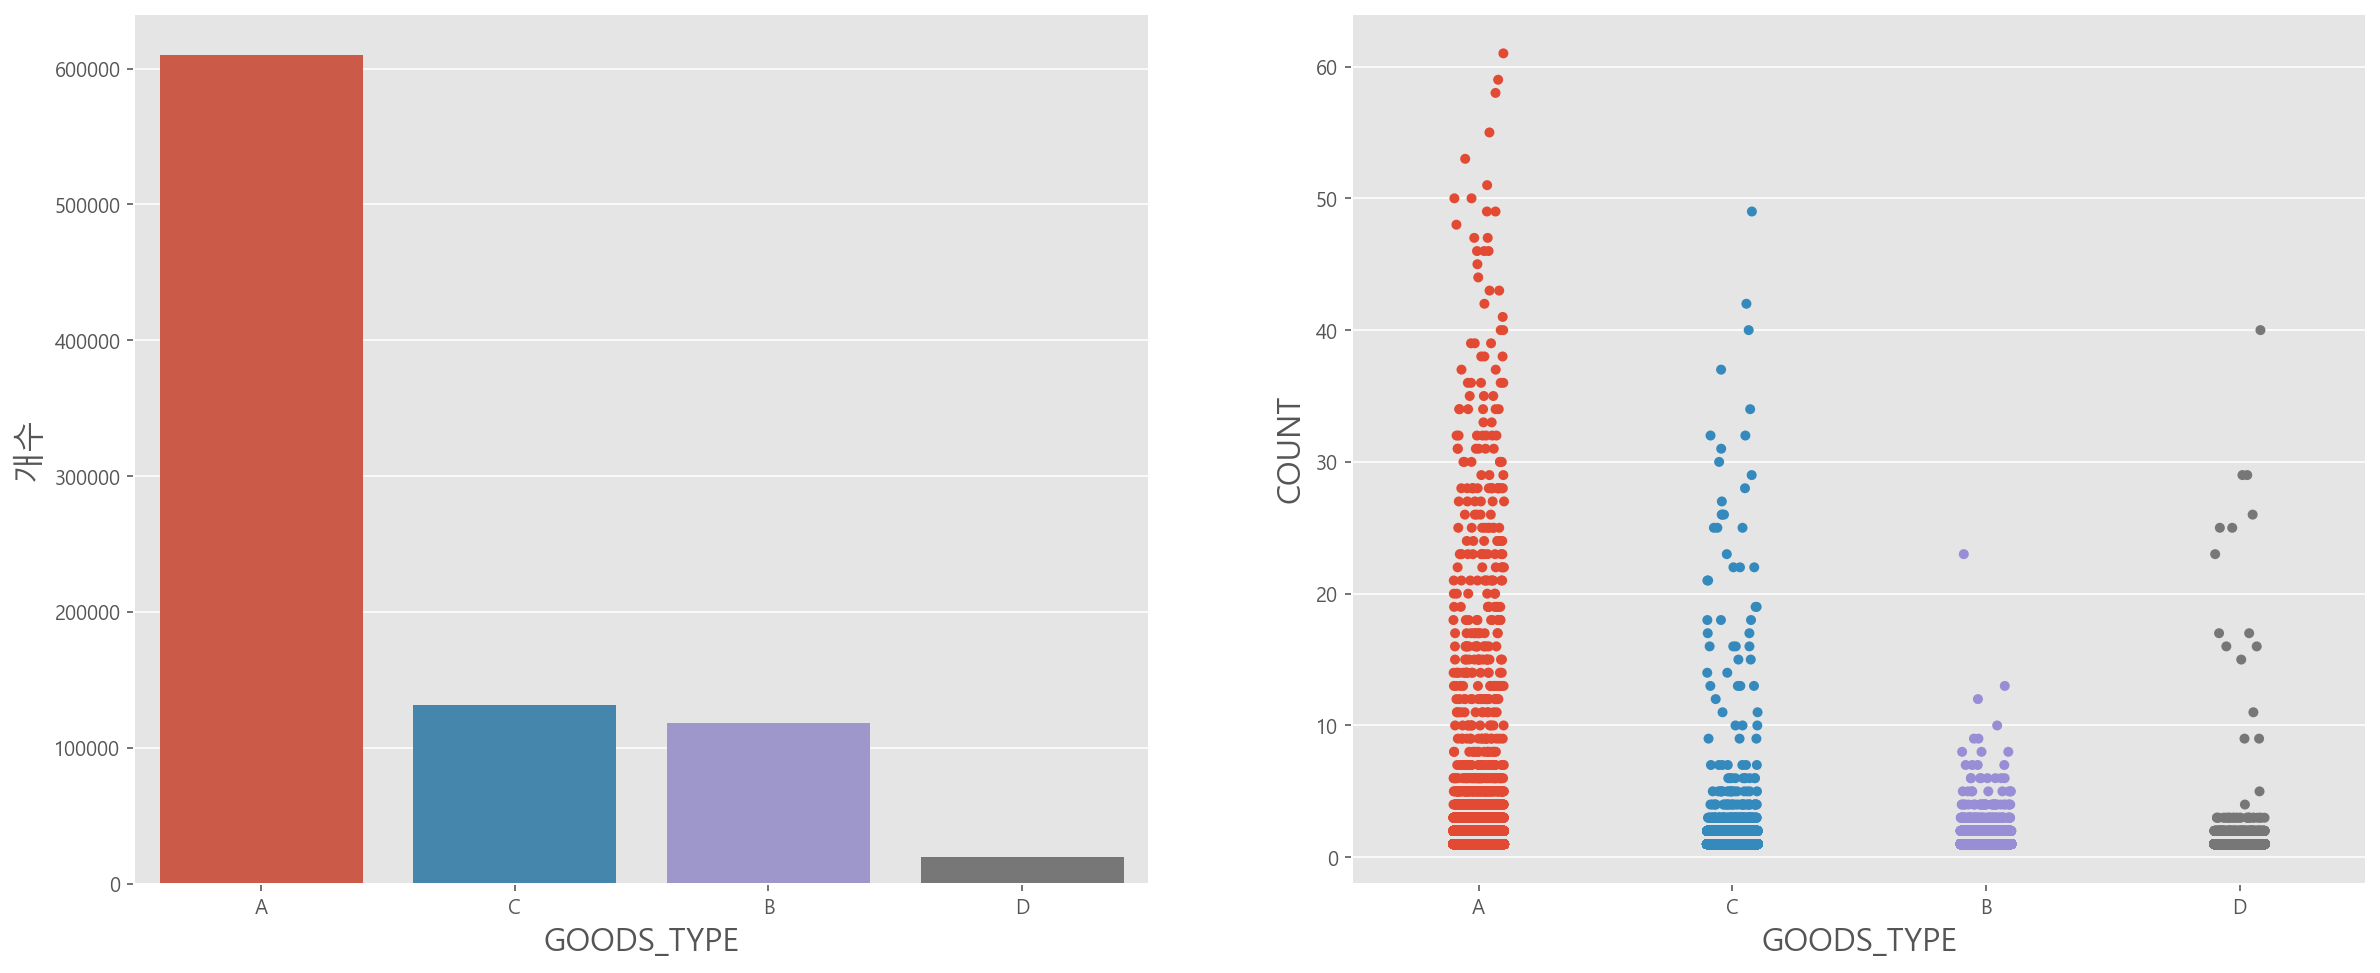

In [24]:
fig = plt.figure(figsize=(20,8))
sns.countplot(data=df, x='GOODS_TYPE', ax=fig.add_subplot(gs[0,0]))

plt.ylabel('개수', fontsize=16)
plt.xlabel('GOODS_TYPE', fontsize=16)

sns.stripplot(x=df['GOODS_TYPE'], y=df['COUNT'], ax=fig.add_subplot(gs[0,1]))
plt.ylabel('COUNT', fontsize=16)
plt.xlabel('GOODS_TYPE', fontsize=16)
fig.show()

* ## 공휴일

<AxesSubplot:xlabel='DATE', ylabel='COUNT'>

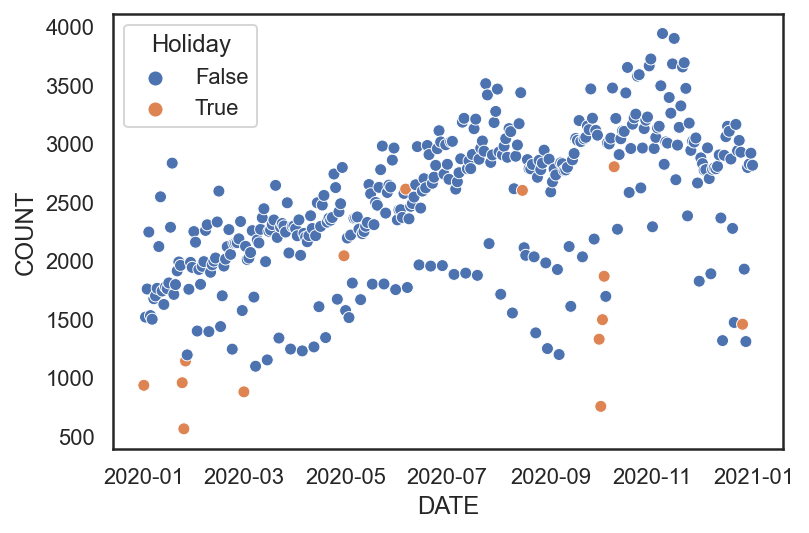

In [27]:
# 공휴일=True
공휴일 = df.groupby(['DATE','Holiday'])['COUNT'].sum().reset_index()

sns.scatterplot(data=공휴일, x='DATE', y='COUNT', hue='Holiday')

* ## 변수별 상관계수

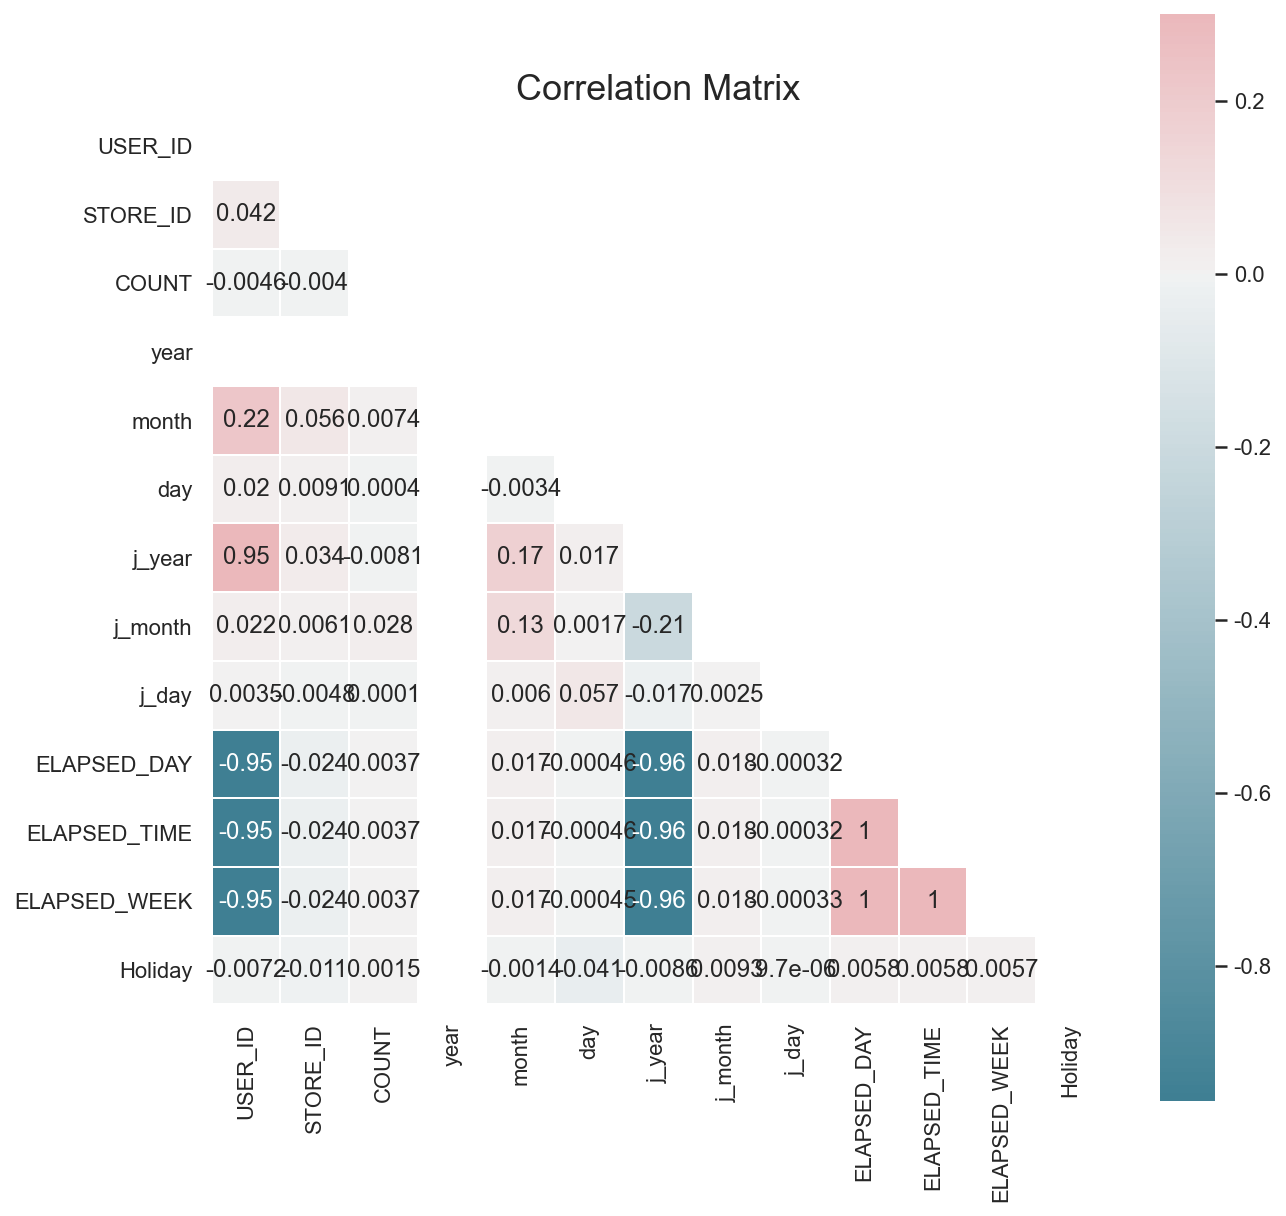

In [24]:
sns.set(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True)
plt.show()